In [1]:
## adicionei seaborn, matplotlib e geopy.distance
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import geopy.distance
import geopy

pd.options.display.float_format = '{:,}'.format

In [2]:
##
print(os.listdir('../input/sao-paulo-metro'))
print(os.listdir('../input/sao-paulo-real-estate-sale-rent-april-2019'))

['metrosp_stations_v2.csv', 'metrosp_stations.csv']
['sao-paulo-properties-april-2019.csv']


# 3. Tratamento dos dados





In [3]:
# explorando arquivo csv do metro
nRowsRead = 1000 # specify 'None' if want to read whole file
metro = pd.read_csv('../input/sao-paulo-metro/metrosp_stations_v2.csv', delimiter=',', nrows = nRowsRead)
metro.dataframeName = 'metrosp_stations_v2.csv'
print(metro.shape)


(79, 6)


In [4]:
#Conferindo tipos e se há dados faltantes
pd.DataFrame({'tipos':metro.dtypes, 'missing':metro.isna().sum()})

,tipos,missing
Unnamed: 0,object,0
name,object,0
station,object,0
lat,float64,0
lon,float64,0
line,object,0


In [5]:
metro.head()

,Unnamed: 0,name,station,lat,lon,line
0,aacd-servidor,Aacd Servidor,aacd-servidor,-23.597824600000003,-46.652374,['lilas']
1,adolfo-pinheiro,Adolfo Pinheiro,adolfo-pinheiro,-23.6500726,-46.7042057,['lilas']
2,alto-da-boa-vista,Alto Da Boa Vista,alto-da-boa-vista,-23.641625100000002,-46.6994344,['lilas']
3,alto-do-ipiranga,Alto Do Ipiranga,alto-do-ipiranga,-23.6022366,-46.6124857,['verde']
4,ana-rosa,Ana Rosa,ana-rosa,-23.581871300000003,-46.6381039,"['azul', 'verde']"


In [6]:
#Removendo as colunas repetidas: 'Unnamed: 0' e 'station'
metro.drop('Unnamed: 0', axis=1, inplace = True)
metro.drop('station', axis=1, inplace = True)

#Corrigindo coluna 'line': Removendo colchete
metro['line'] = metro['line'].map(lambda x: x.lstrip('[').rstrip(']'))

#Corrigindo coluna 'line': Removendo aspas simples
metro['line'] = metro['line'].str.replace("'", "")

#Nova columa com tipo da estação: normal ou com baldeaçáo
def add(metro):

    conditions = [
        (metro['line'] == 'azul'),
        (metro['line'] == 'lilas'),
        (metro['line'] == 'verde'),
        (metro['line'] == 'amarela'),
        (metro['line'] == 'vermelha'),
        (metro['line'] == 'prata')] 
    
    choices = ['normal', 'normal', 'normal', 'normal', 'normal', 'normal']
    metro['line_type'] = np.select(conditions, choices, default= 'transfer')

    return metro

new_df=add(metro)

#Conferindo atualizacoes
metro.head()

,name,lat,lon,line,line_type
0,Aacd Servidor,-23.597824600000003,-46.652374,lilas,normal
1,Adolfo Pinheiro,-23.6500726,-46.7042057,lilas,normal
2,Alto Da Boa Vista,-23.641625100000002,-46.6994344,lilas,normal
3,Alto Do Ipiranga,-23.6022366,-46.6124857,verde,normal
4,Ana Rosa,-23.581871300000003,-46.6381039,"azul, verde",transfer


In [7]:
metro.round(decimals=7)

,name,lat,lon,line,line_type
0,Aacd Servidor,-23.5978246,-46.652374,lilas,normal
1,Adolfo Pinheiro,-23.6500726,-46.7042057,lilas,normal
2,Alto Da Boa Vista,-23.6416251,-46.6994344,lilas,normal
3,Alto Do Ipiranga,-23.6022366,-46.6124857,verde,normal
4,Ana Rosa,-23.5818713,-46.6381039,"azul, verde",transfer
5,Anhangabau,-23.5478254,-46.63918,vermelha,normal
6,Armenia,-23.5254103,-46.629259,azul,normal
7,Artur Alvim,-23.5402438,-46.4847063,vermelha,normal
8,Belem,-23.5428718,-46.589615,vermelha,normal
9,Borba Gato,-23.6334661,-46.6928675,lilas,normal


In [8]:
line_type_colors = [ 
                    '#6890F0',  # AZUL
                    '#C03028',  # VERMELHA
                    '#A040A0',  # LILAS
                    '#78C850',  # VERDE
                    '#F8D030',  # AMARELA
                    '#C0C0C0',  # PRATA
    
                    '#98D8D8',  # TRANSFER      
                    '#98D8D8',  # TRANSFER
                    '#98D8D8',  # TRANSFER
                    '#98D8D8',  # TRANSFER
                    '#98D8D8',  # TRANSFER
                    '#98D8D8',  # TRANSFER
                    '#98D8D8',  # TRANSFER

                   ]

In [9]:
## explorando arquivo csv dos apartamentos
nRowsRead = 14000 
imoveis = pd.read_csv('../input/sao-paulo-real-estate-sale-rent-april-2019/sao-paulo-properties-april-2019.csv', delimiter=',', nrows = nRowsRead)
imoveis.dataframeName = 'sao-paulo-properties-april-2019.csv'
print(imoveis.shape)

(13640, 16)


In [10]:
#Conferindo tipos e se há dados faltantes
pd.DataFrame({'tipos':imoveis.dtypes, 'missing':imoveis.isna().sum()})

,tipos,missing
Price,int64,0
Condo,int64,0
Size,int64,0
Rooms,int64,0
Toilets,int64,0
Suites,int64,0
Parking,int64,0
Elevator,int64,0
Furnished,int64,0
Swimming Pool,int64,0


In [11]:
#Removendo as colunas desnecessarias: 'District' e 'Property Type'
imoveis
imoveis.drop('Property Type', axis=1, inplace = True)

#Conferindo atualizacoes
imoveis.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.550239,-46.480717999999996
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.542818,-46.485665000000004
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.547171,-46.483014000000004
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.525025,-46.482436


In [12]:
mask = (imoveis.Longitude < -46) & (imoveis.Longitude > -46.9) & (imoveis.Latitude < -23) & (imoveis.Latitude > -24)
imoveis = imoveis[mask]
imoveis.columns = imoveis.columns.str.lower().str.replace(" ","_")

imoveis.head()

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,district,negotiation_type,latitude,longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.550239,-46.480717999999996
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.542818,-46.485665000000004
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.547171,-46.483014000000004
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.525025,-46.482436


# # 4. Análise/exploração dos dados


# 4.1. Metrô

In [13]:
#Contagem de estações
metro.groupby("line_type").agg(['count','nunique']).line

,count,nunique
line_type,,
normal,71,6
transfer,8,7


In [14]:
#Quantidade de estacoes por linha
metro.groupby("line").count().name.sort_values(ascending=False)

line
azul                 18
vermelha             16
lilas                14
verde                10
amarela               8
prata                 5
azul, verde           2
prata, verde          1
lilas, verde          1
azul, vermelha        1
azul, lilas           1
amarela, vermelha     1
amarela, azul         1
Name: name, dtype: int64

Text(0.5, 1.0, 'Estações por Linhas')

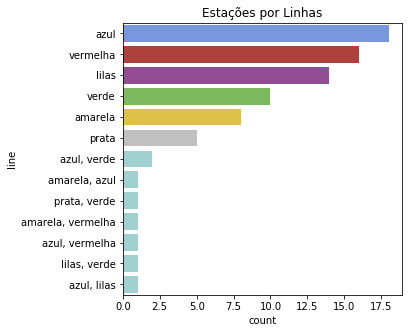

In [15]:
#Quantidade de estacoes por linha
plt.figure(figsize=(5, 5))
sns.countplot(y='line',data=metro, 
              palette=line_type_colors, order = metro['line']
              .value_counts().index).set_title('Estações por Linhas')


Text(0.5, 1.0, 'Distribuição das Estações')

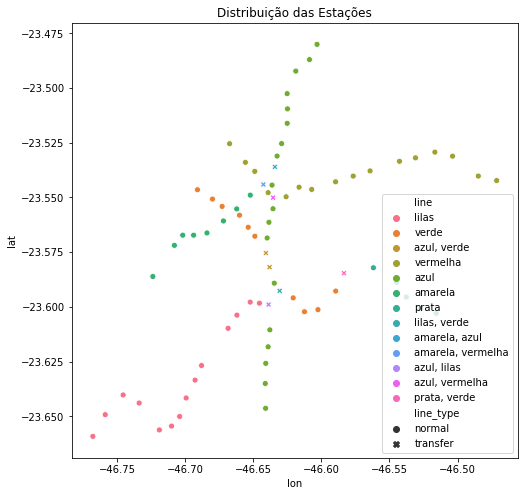

In [16]:
#Distribuicao das estacoes atraves de lat long
plt.figure(figsize=(8, 8))
sns.scatterplot(data=metro, x="lon", y="lat",
                hue='line', style='line_type').set_title('Distribuição das Estações')

# 4.2. Apartamento

In [17]:
#Media de valor por atributo
imoveis.mean(axis=0).drop(['price','latitude','longitude'], axis=0).round(decimals=2)

condo           696.38
size             84.91
rooms             2.32
toilets           2.11
suites            1.01
parking           1.41
elevator          0.37
furnished         0.15
swimming_pool     0.52
new               0.02
dtype: float64

In [18]:
venda = imoveis.negotiation_type == "sale"
imoveis_venda = imoveis[venda]
imoveis_venda.describe().drop(['longitude','latitude'],axis = 1).round(decimals=2)

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new
count,"5,940.0","5,940.0","5,940.0","5,940.0","5,940.0","5,940.0","5,940.0","5,940.0","5,940.0","5,940.0","5,940.0"
mean,"616,887.05",540.32,79.08,2.33,2.07,0.96,1.34,0.43,0.12,0.55,0.03
std,"744,132.72",620.22,50.59,0.72,0.91,0.76,0.75,0.5,0.32,0.5,0.18
min,"45,000.0",0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"254,100.0",150.0,50.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
50%,"389,950.0",400.0,62.5,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0
75%,"688,000.0",700.0,88.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0
max,"10,000,000.0","8,920.0",620.0,6.0,7.0,6.0,7.0,1.0,1.0,1.0,1.0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


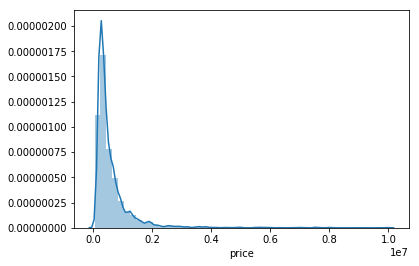

In [19]:
#Histograma
venda = imoveis.negotiation_type == "sale"
imoveis_venda = imoveis[venda]
sns.distplot(imoveis_venda['price'])

In [20]:
aluguel = imoveis.negotiation_type == "rent"
imoveis_aluguel = imoveis[aluguel]
imoveis_aluguel.describe().drop(['longitude','latitude'],axis = 1).round(decimals=2)

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new
count,"6,710.0","6,710.0","6,710.0","6,710.0","6,710.0","6,710.0","6,710.0","6,710.0","6,710.0","6,710.0","6,710.0"
mean,"3,108.93",834.53,90.07,2.32,2.14,1.06,1.46,0.31,0.18,0.49,0.0
std,"3,580.51",845.08,63.98,0.83,0.99,0.87,0.89,0.46,0.38,0.5,0.02
min,480.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"1,380.0",399.25,52.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
50%,"2,000.0",600.0,68.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
75%,"3,300.0","1,000.0",101.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0
max,"50,000.0","9,500.0",880.0,10.0,8.0,5.0,9.0,1.0,1.0,1.0,1.0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


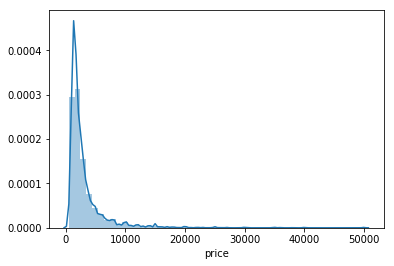

In [21]:
#Histograma
aluguel = imoveis.negotiation_type == "rent"
imoveis_aluguel = imoveis[aluguel]
sns.distplot(imoveis_aluguel['price'])

Text(0.5, 1.0, 'Correlação de atributos - Venda')

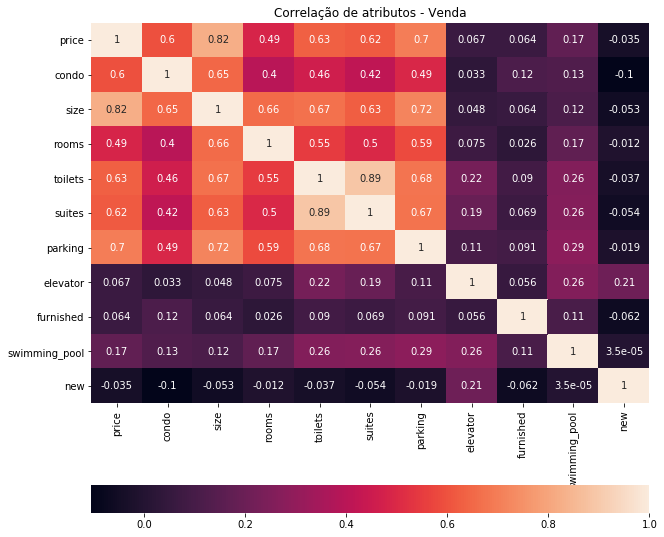

In [22]:
venda = imoveis.negotiation_type == "sale"
imoveis_venda = imoveis[venda].drop(['longitude','latitude'],axis = 1)

#Matriz de Correlação para Vendas
plt.figure(figsize=(10, 10))
sns.heatmap(imoveis_venda.corr(), 
            annot = True, 
            cbar_kws= {'orientation': 'horizontal'}).set_title('Correlação de atributos - Venda')


Text(0.5, 1.0, 'Correlação de atributos - Aluguel')

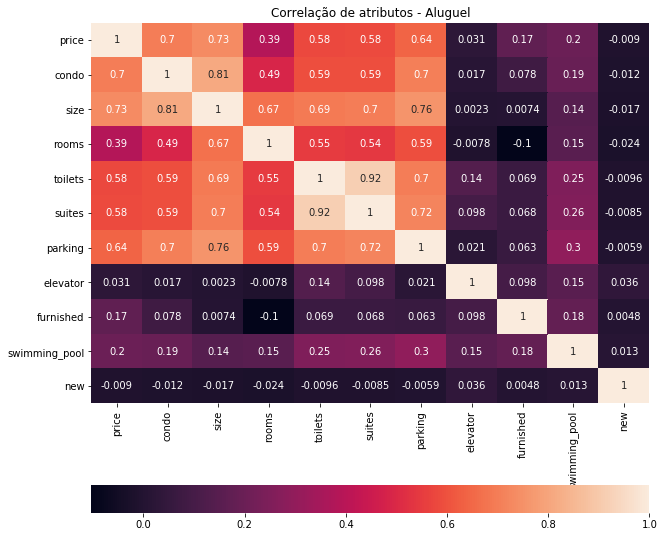

In [23]:
aluguel = imoveis.negotiation_type == "rent"
imoveis_aluguel = imoveis[aluguel].drop(['longitude','latitude'],axis = 1)

#Matriz de Correlação para Aluguel
plt.figure(figsize=(10, 10))
sns.heatmap(imoveis_aluguel.corr(), 
            annot = True, 
            cbar_kws= {'orientation': 'horizontal'}).set_title('Correlação de atributos - Aluguel')


Text(0.5, 1.0, 'Distribuição dos imóveis')

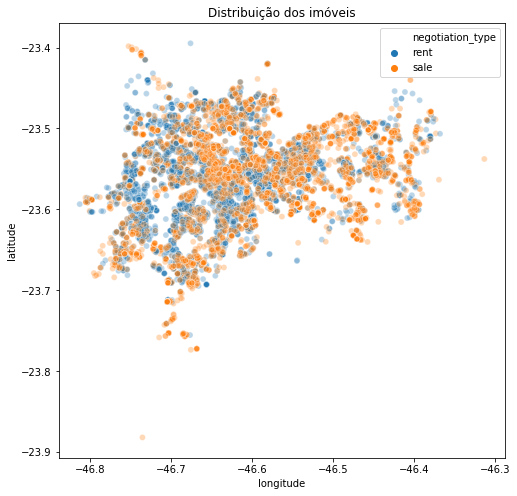

In [24]:
#Distribuicao dos imóveis atraves de lat long
plt.figure(figsize=(8, 8))
sns.scatterplot(data=imoveis, 
                x="longitude", y="latitude", 
                hue="negotiation_type", alpha=0.3).set_title('Distribuição dos imóveis')

# 4.3. Estação mais próxima dos imóveis

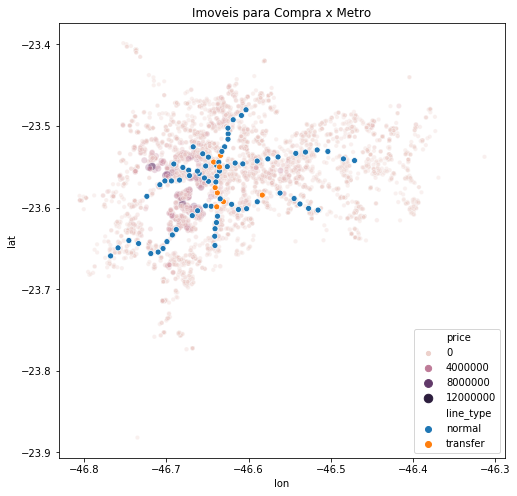

In [25]:
#Imoveis a venda e estacoes

venda = imoveis.negotiation_type == "sale"
imoveis_venda = imoveis[venda]
plt.figure(figsize=(8, 8))

#Imoveis a venda
sns.scatterplot(data=imoveis_venda, 
                x="longitude", y="latitude", 
                hue="price", size="price", alpha=0.3).set_title('Imoveis para Compra x Metro')

#Estações
sns.scatterplot(data=metro, x="lon", y="lat",hue='line_type')

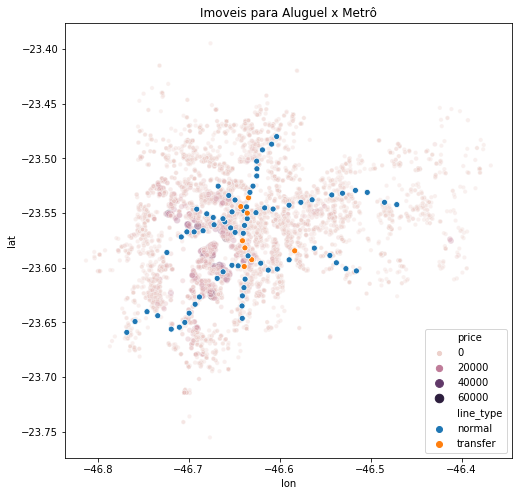

In [26]:
aluguel = imoveis.negotiation_type == "rent"
imoveis_aluguel = imoveis[aluguel]
plt.figure(figsize=(8, 8))

#Imóveis para alugar
sns.scatterplot(data=imoveis_aluguel, 
                x="longitude", y="latitude", 
                hue="price", size="price", alpha=0.3).set_title('Imoveis para Aluguel x Metrô')

#Estações
sns.scatterplot(data=metro, x="lon", y="lat",hue='line_type')

In [27]:
#Nova coluna com as coordernadas juntas
imoveis["property_coords"] = list(zip(imoveis.longitude, imoveis.latitude))
metro["station_coords"] = list(zip(metro.lon, metro.lat))

In [28]:
metro.head()

,name,lat,lon,line,line_type,station_coords
0,Aacd Servidor,-23.597824600000003,-46.652374,lilas,normal,"(-46.652374, -23.597824600000003)"
1,Adolfo Pinheiro,-23.6500726,-46.7042057,lilas,normal,"(-46.7042057, -23.6500726)"
2,Alto Da Boa Vista,-23.641625100000002,-46.6994344,lilas,normal,"(-46.6994344, -23.641625100000002)"
3,Alto Do Ipiranga,-23.6022366,-46.6124857,verde,normal,"(-46.6124857, -23.6022366)"
4,Ana Rosa,-23.581871300000003,-46.6381039,"azul, verde",transfer,"(-46.6381039, -23.581871300000003)"


Estação mais próxima

In [29]:
#Achar a estacao mais proxima

def get_list_of_nearest_stations(properties):
    nearest = []
    names = []
    distances = []
    
    for name,line in zip(metro.station_coords, metro.index):
        names.append(name)
        distances.append(geopy.distance.distance(properties, name).km)
        min_value_index = distances.index(min(distances))
        
    nearest.append(names[min_value_index])
    
    return pd.Series(nearest)


imoveis['nearest_metro_station_coords'] = imoveis.property_coords.apply(get_list_of_nearest_stations)

In [30]:
#mesclar tabelas
imoveis_e_estacoes = pd.merge(imoveis, metro, 
                              left_on="nearest_metro_station_coords",
                              right_on= "station_coords")

imoveis_e_estacoes.drop('nearest_metro_station_coords', axis=1, inplace = True)

imoveis_e_estacoes.head()

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,district,negotiation_type,latitude,longitude,property_coords,name,lat,lon,line,line_type,station_coords
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.543138,-46.479486,"(-46.479486, -23.543138)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)"
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.550239,-46.480717999999996,"(-46.480717999999996, -23.550239)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)"
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.542818,-46.485665000000004,"(-46.485665000000004, -23.542818)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)"
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.547171,-46.483014000000004,"(-46.483014000000004, -23.547171)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)"
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.525025,-46.482436,"(-46.482436, -23.525025)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)"


In [31]:
aluguel = imoveis_e_estacoes.negotiation_type == "rent"
imoveis_e_estacoes_aluguel = imoveis_e_estacoes[aluguel]

aluguel_count = imoveis_e_estacoes_aluguel.groupby(["name"])["name"].count().reset_index(name="count").sort_values('count', ascending=False)
aluguel_price = imoveis_e_estacoes_aluguel.groupby(["name"]).agg({'price': 'mean'}).round(decimals=2).sort_values('price', ascending=False)

#Listagem quantidade de imoveis x Preço médio
aluguel_estacoes = pd.merge(pd.merge(aluguel_count,aluguel_price,on="name"),metro,on="name")
print(aluguel_estacoes)

                             name                     ...                                                  station_coords
0               Sao Paulo Morumbi                     ...                       (-46.72391210000001, -23.586136800000002)
1                   Vila Madalena                     ...                                      (-46.6911243, -23.5464956)
2           Palmeiras Barra Funda                     ...                                      (-46.6675134, -23.5254616)
3            Corinthians Itaquera                     ...                              (-46.4712065, -23.542299399999997)
4                         Butanta                     ...                                      (-46.7080896, -23.5718995)
5                      Eucaliptos                     ...                               (-46.668617, -23.609795499999997)
6                          Sacoma                     ...                              (-46.602555200000005, -23.6012824)
7               Fradique

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Preço médio de aluguel por linha mais próxima')

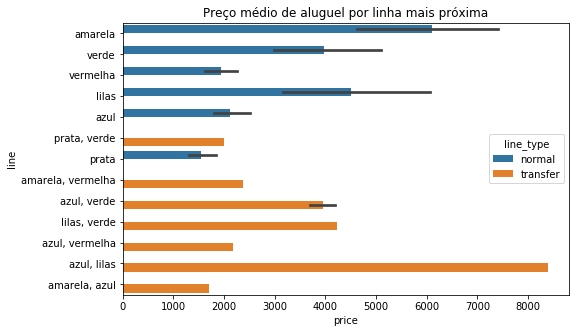

In [32]:
aluguel_estacoes.groupby(["line"]).agg({'price': 'mean'}).round(decimals=2).sort_values('price', ascending=False)

#Gráfico ALUGUEL quantidade de imoveis x Preço médio
plt.figure(figsize=(8, 5))
sns.barplot(y='line', x='price',hue='line_type',data=aluguel_estacoes).set_title('Preço médio de aluguel por linha mais próxima')

In [33]:
venda = imoveis_e_estacoes.negotiation_type == "sale"
imoveis_e_estacoes_venda = imoveis_e_estacoes[venda]

venda_count = imoveis_e_estacoes_venda.groupby(["name"])["name"].count().reset_index(name="count").sort_values('count', ascending=False)
venda_price = imoveis_e_estacoes_venda.groupby(["name"]).agg({'price': 'mean'}).round(decimals=2).sort_values('price', ascending=False)

#Listagem quantidade de imoveis x Preço médio
venda_estacoes = pd.merge(pd.merge(venda_count,venda_price,on="name"),metro,on="name")
venda_estacoes.head()

,name,count,price,lat,lon,line,line_type,station_coords
0,Corinthians Itaquera,669,"219,187.86",-23.542299399999997,-46.4712065,vermelha,normal,"(-46.4712065, -23.542299399999997)"
1,Palmeiras Barra Funda,299,"563,004.73",-23.5254616,-46.6675134,vermelha,normal,"(-46.6675134, -23.5254616)"
2,Vila Madalena,219,"747,084.39",-23.5464956,-46.6911243,verde,normal,"(-46.6911243, -23.5464956)"
3,Tucuruvi,199,"340,615.14",-23.48006945,-46.603240966171505,azul,normal,"(-46.603240966171505, -23.48006945)"
4,Belem,166,"555,589.57",-23.5428718,-46.589615,vermelha,normal,"(-46.589615, -23.5428718)"


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Preço médio de venda por linha mais próxima')

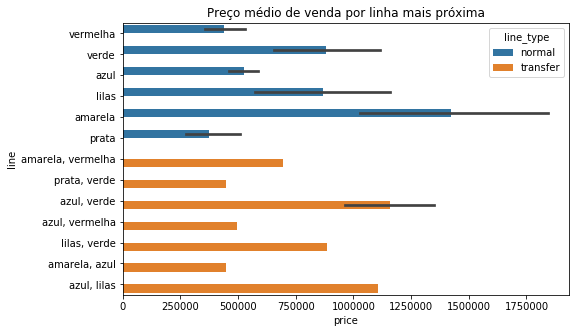

In [34]:
venda_estacoes.groupby(["line"]).agg({'price': 'mean'}).round(decimals=2).sort_values('price', ascending=False)

#Gráfico VENDA quantidade de imoveis x Preço médio
plt.figure(figsize=(8, 5))
sns.barplot(y='line', x='price',hue='line_type',data=venda_estacoes).set_title('Preço médio de venda por linha mais próxima')

                                                price
name                                                 
Pinheiros                                2,532,675.34
Hospital Sao Paulo                        2,191,500.0
Fradique Coutinho                        1,779,359.73
Oscar Freire                             1,779,063.16
Moema                                    1,751,913.04
Eucaliptos                               1,555,287.11
Faria Lima                               1,495,321.43
Trianon Masp                             1,493,685.71
Consolacao                               1,415,470.59
Paraiso                                   1,350,257.0
Paulista                                 1,291,363.64
Butanta                                  1,289,799.24
Brooklin                                 1,267,727.99
Clinicas                                 1,174,090.91
Santa Cruz                                1,108,440.0
Santuario Nossa Senhora De Fatima Sumare 1,063,894.44
Aacd Servidor               

Text(0.5, 1.0, 'Média de aluguel por estação mais próxima')

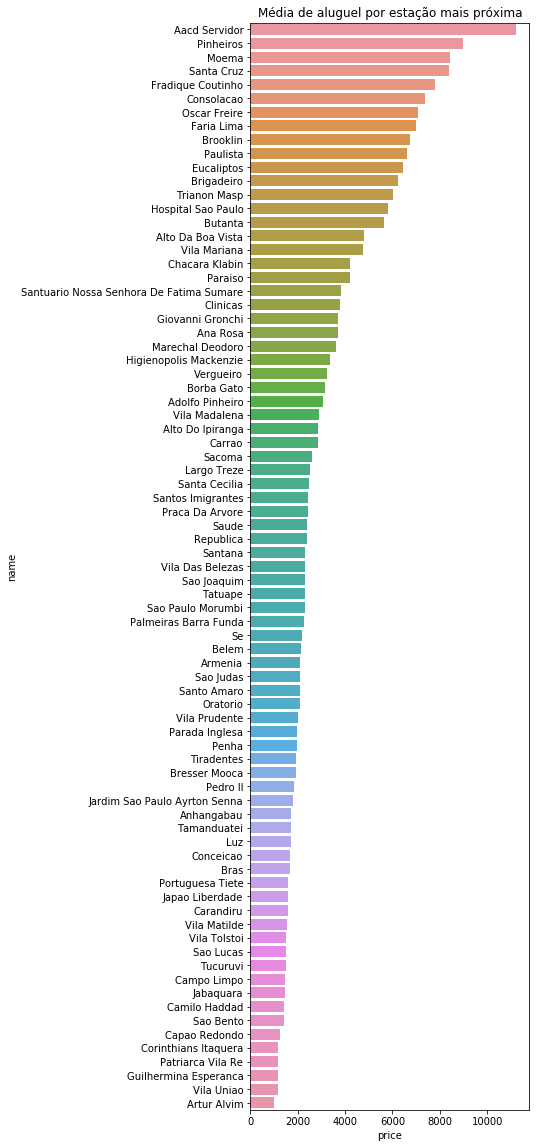

In [35]:
print(venda_price)

#Gráfico ALUGUEL  Preço médio
plt.figure(figsize=(5, 20))
sns.barplot(y='name', x='price',data=aluguel_estacoes,order=aluguel_estacoes.sort_values('price', ascending=False).name) .set_title('Média de aluguel por estação mais próxima')


Text(0.5, 1.0, 'Média de venda por estação de metrô x Quantidade de imóveis')

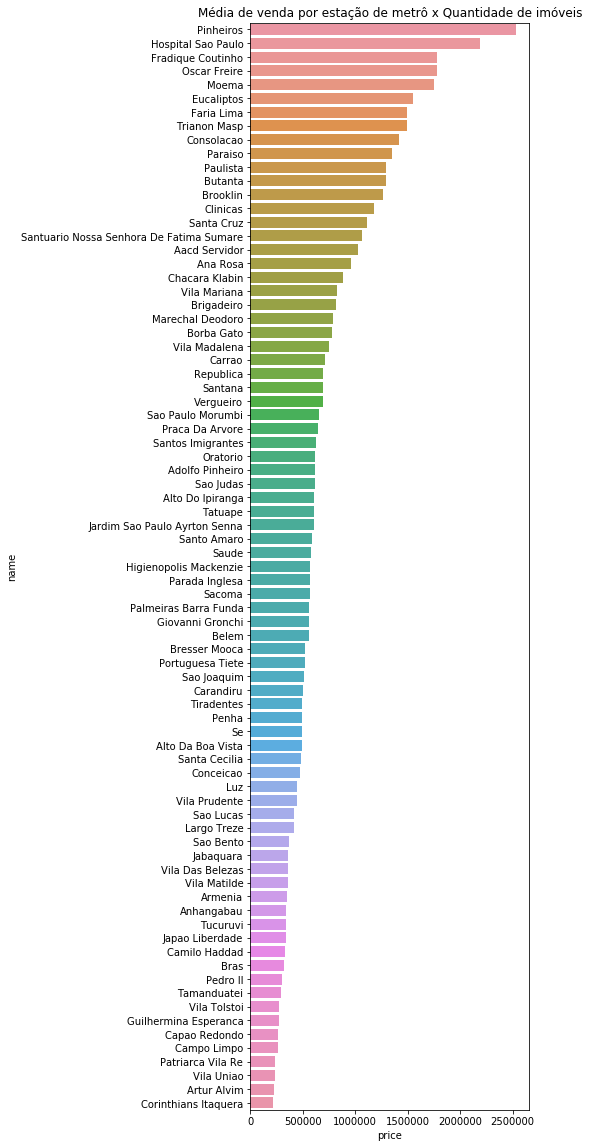

In [36]:
#Gráfico VENDA quantidade de imoveis x Preço médio
plt.figure(figsize=(5, 20))
sns.barplot(y='name', x='price',data=venda_estacoes,order=venda_estacoes.sort_values('price', ascending=False).name) .set_title('Média de venda por estação de metrô x Quantidade de imóveis')

Text(0.5, 1.0, 'Distribuição das Estações - Quantidade de imoveis alugando atendidos e Preço médio')

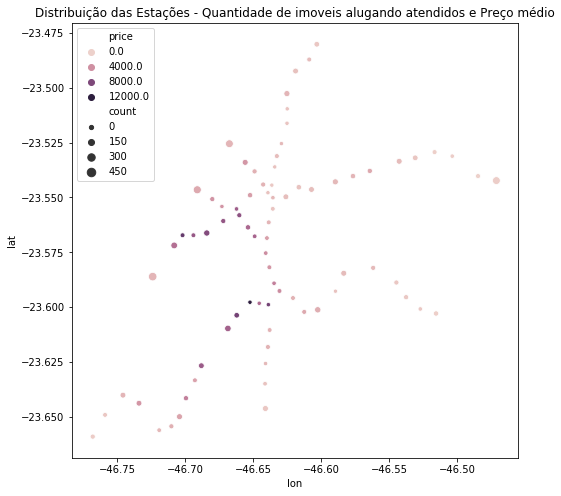

In [37]:
#Distribuição das Estações - Maior quantidade de apartamentos alugando atendidos
plt.figure(figsize=(8, 8))
sns.scatterplot(data=aluguel_estacoes, x="lon", y="lat",
                size='count', hue='price').set_title('Distribuição das Estações - Quantidade de imoveis alugando atendidos e Preço médio')

Text(0.5, 1.0, 'Distribuição das Estações - Quantidade de imoveis a venda atendidos e Preço médio')

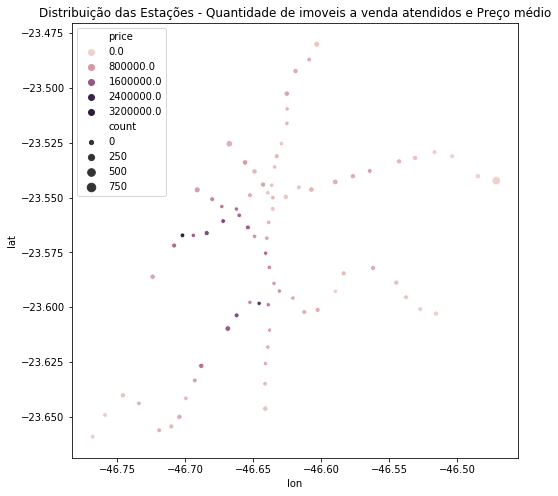

In [38]:
#Distribuição das Estações - Maior quantidade de apartamentos a venda atendidos
plt.figure(figsize=(8, 8))
sns.scatterplot(data=venda_estacoes, x="lon", y="lat",
                size='count', hue='price').set_title('Distribuição das Estações - Quantidade de imoveis a venda atendidos e Preço médio')

Distancia dos imoveis

In [39]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [40]:
distances_km = []
for row in imoveis_e_estacoes.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.latitude, row.longitude, row.lat, row.lon)
   )

In [41]:
imoveis_e_estacoes['distancia_do_imóvel'] = distances_km
imoveis_e_estacoes.head()

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,district,negotiation_type,latitude,longitude,property_coords,name,lat,lon,line,line_type,station_coords,distancia_do_imóvel
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.543138,-46.479486,"(-46.479486, -23.543138)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)",0.62
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.550239,-46.480717999999996,"(-46.480717999999996, -23.550239)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)",1.18
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.542818,-46.485665000000004,"(-46.485665000000004, -23.542818)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)",0.3
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,-23.547171,-46.483014000000004,"(-46.483014000000004, -23.547171)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)",0.79
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.525025,-46.482436,"(-46.482436, -23.525025)",Artur Alvim,-23.5402438,-46.4847063,vermelha,normal,"(-46.4847063, -23.5402438)",1.71


In [42]:
imoveis_e_estacoes['distancia_do_imóvel'].describe().round(decimals=2)

count   12,650.0
mean        2.32
std         2.25
min         0.01
25%          0.7
50%         1.67
75%         3.02
max        25.13
Name: distancia_do_imóvel, dtype: float64

In [43]:
#Describe por linha


In [44]:
imoveis_e_linhas_distance = imoveis_e_estacoes.groupby(["line"]).agg({'distancia_do_imóvel': 'mean'}).round(decimals=2).sort_values('distancia_do_imóvel', ascending=False)
print(imoveis_e_linhas_distance)

                   distancia_do_imóvel
line                                  
amarela                            2.7
vermelha                          2.67
verde                             2.55
lilas                             2.33
prata                             1.77
azul                              1.68
prata, verde                      1.24
lilas, verde                      0.94
azul, verde                       0.67
amarela, azul                     0.57
azul, lilas                       0.49
amarela, vermelha                 0.34
azul, vermelha                     0.3


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distância média da linha mais próxima')

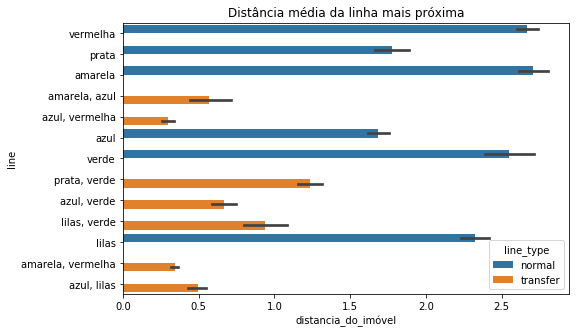

In [45]:
#Gráfico VENDA quantidade de imoveis x Preço médio
plt.figure(figsize=(8, 5))
sns.barplot(y='line', x='distancia_do_imóvel',hue='line_type',data=imoveis_e_estacoes).set_title('Distância média da linha mais próxima')

In [46]:
imoveis_e_estacoes_distance = imoveis_e_estacoes.groupby(["name"]).agg({'distancia_do_imóvel': 'mean'}).round(decimals=2).sort_values('distancia_do_imóvel', ascending=False)
imoveis_e_estacoes_distance.head(5)

,distancia_do_imóvel
name,
Largo Treze,6.16
Corinthians Itaquera,5.42
Vila Madalena,4.56
Butanta,4.43
Sao Paulo Morumbi,3.54


In [47]:
imoveis_e_estacoes_distance.tail(5)

,distancia_do_imóvel
name,
Sao Joaquim,0.45
Anhangabau,0.44
Sao Bento,0.39
Republica,0.34
Se,0.3


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distancia media dos imoveis até a estação')

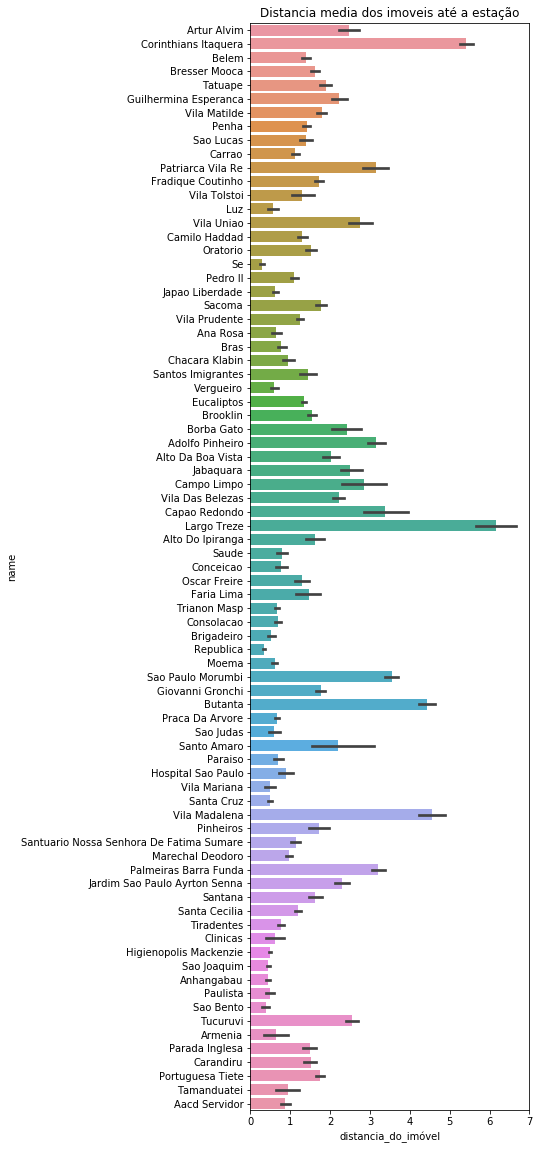

In [48]:
plt.figure(figsize=(5, 20))
sns.barplot(y='name', x='distancia_do_imóvel',data=imoveis_e_estacoes).set_title('Distancia media dos imoveis até a estação') #order=imoveis_e_estacoes.sort_values('distancia_do_imóvel', ascending=False).name)#

In [49]:
#Correlacao da distancia do imovel com preço
aluguel = imoveis_e_estacoes[(imoveis_e_estacoes['negotiation_type'] == "rent")]
aluguel['price'].corr(aluguel['distancia_do_imóvel'])

-0.13884582162788292

In [50]:
#Correlacao da distancia do imovel (entre 75 e 85 m2) com preço
aluguel = imoveis_e_estacoes[
    (imoveis_e_estacoes['negotiation_type'] == "rent") & 
    (imoveis_e_estacoes['size'] >= 75) & 
    (imoveis_e_estacoes['size']<= 85) &
    (imoveis_e_estacoes['rooms']== 2) &
    (imoveis_e_estacoes['toilets']== 2) &
    (imoveis_e_estacoes['parking']== 1) ]



aluguel['price'].corr(aluguel['distancia_do_imóvel'])

-0.07511360556554023

In [51]:
venda = imoveis_e_estacoes[(imoveis_e_estacoes.negotiation_type == "sale")]

venda['price'].corr(venda['distancia_do_imóvel'])

-0.20704601310619475

In [52]:
venda = imoveis_e_estacoes[
    (imoveis_e_estacoes['negotiation_type'] == "sale") & 
    (imoveis_e_estacoes['size'] >= 75) & 
    (imoveis_e_estacoes['size']<= 85) &
    (imoveis_e_estacoes['rooms']== 2) &
    (imoveis_e_estacoes['toilets']== 2) &
    (imoveis_e_estacoes['parking']== 1) ]

venda['price'].corr(venda['distancia_do_imóvel'])

-0.17042037700853876